# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [127]:
#!kaggle datasets download -d khaledzsa/parkinglot-occupation
#!unzip parkinglot-occupation.zip

In [128]:
%pip install -q opendatasets
import opendatasets as od
datasets=od.download("https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation")



Skipping, found downloaded files in "./parkinglot-occupation" (use force=True to force download)


## Import Libraries

In [129]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [130]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/parkinglot-occupation/ParkingLot_Occupation",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1726 files belonging to 2 classes.
Using 1381 files for training.
Using 345 files for validation.


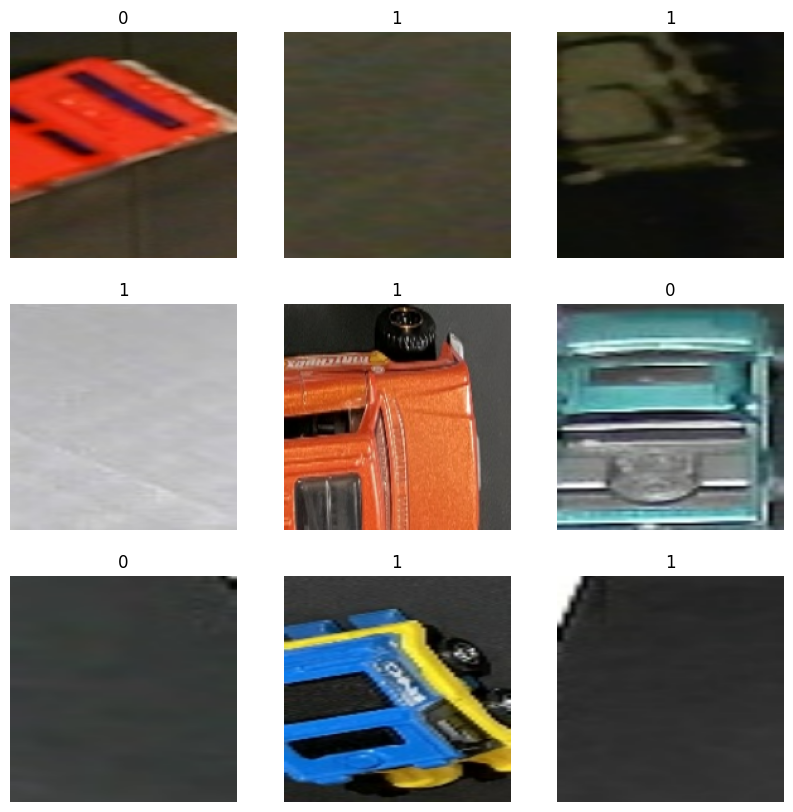

In [131]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [132]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

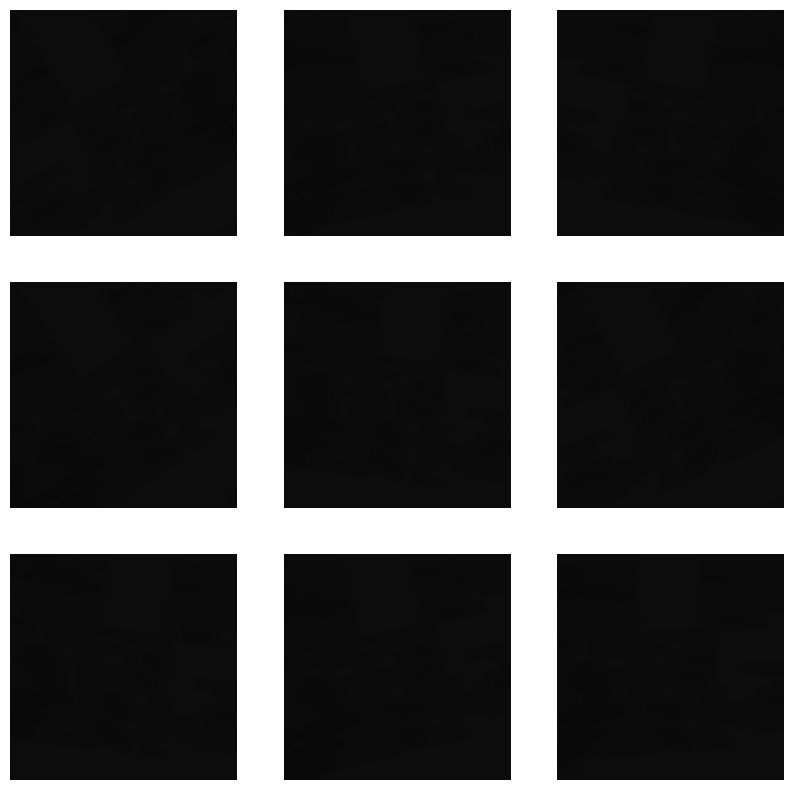

In [133]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [134]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [135]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │       7,573,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,593,090 (28.97 MB)

 Trainable params: 7,593,090 (28.97 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [136]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [137]:

history=model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step - accuracy: 0.6546 - loss: 520.6395 - val_accuracy: 0.8058 - val_loss: 3.0669
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 76s 7s/step - accuracy: 0.5612 - loss: 1.4016 - val_accuracy: 0.7014 - val_loss: 0.6658
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 84s 7s/step - accuracy: 0.7565 - loss: 0.6186 - val_accuracy: 0.8087 - val_loss: 0.5849
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 79s 7s/step - accuracy: 0.7910 - loss: 0.5742 - val_accuracy: 0.8087 - val_loss: 0.5543
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 84s 8s/step - accuracy: 0.8046 - loss: 0.5275 - val_accuracy: 0.8087 - val_loss: 0.6161
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 76s 7s/step - accuracy: 0.8067 - loss: 0.6436 - val_accuracy: 0.8087 - val_loss: 0.5874
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step - accuracy: 0.7949 - loss: 0.5051 - val_accuracy: 0.8087 - val_loss: 0.5756
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.7957 - loss: 0.4824 - val_accuracy: 0.8087 - val_los

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [138]:
model.evaluate(val_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8165 - loss: 0.5891


[0.6053650975227356, 0.8086956739425659]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

In [145]:
model.predict(val_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


array([[ -3.1976488 ,  -1.8994175 ],
       [-11.128399  ,  -6.7070427 ],
       [ -1.4053196 ,  -0.8129065 ],
       [ -2.0340786 ,  -1.1940607 ],
       [ -1.450471  ,  -0.8402774 ],
       [ -5.232572  ,  -3.1329894 ],
       [ -2.2264056 ,  -1.3106494 ],
       [ -9.682637  ,  -5.8306217 ],
       [ -9.774426  ,  -5.8862643 ],
       [ -1.2440583 ,  -0.7151498 ],
       [ -2.6496089 ,  -1.5671954 ],
       [-10.298686  ,  -6.2040706 ],
       [ -2.7833571 ,  -1.6482737 ],
       [ -3.9386184 ,  -2.3485937 ],
       [ -2.3697143 ,  -1.3975232 ],
       [ -1.420792  ,  -0.8222859 ],
       [ -2.8646867 ,  -1.6975757 ],
       [ -6.6184635 ,  -3.9731176 ],
       [ -1.3737714 ,  -0.79378194],
       [ -2.3258164 ,  -1.3709122 ],
       [ -2.1835866 ,  -1.2846924 ],
       [ -2.0518224 ,  -1.2048169 ],
       [ -1.9029021 ,  -1.1145413 ],
       [ -0.3122338 ,  -0.15027732],
       [ -5.1083555 ,  -3.0576892 ],
       [ -2.1858046 ,  -1.2860371 ],
       [ -1.6388693 ,  -0.95448446],
 

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

In [153]:
from tensorflow.keras.preprocessing import image
import numpy as np


def prepare_image(file_path, img_size=(180, 180)):
    img = image.load_img(file_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [159]:

new_image = prepare_image("/content/parkinglot-occupation/ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg")

prediction = model.predict(new_image)

predicted_class = np.argmax(prediction, axis=1)

class_names = ["occupied","empty"]
print(f"The model predicts this image as a {class_names[predicted_class[0]]}.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The model predicts this image as a empty.


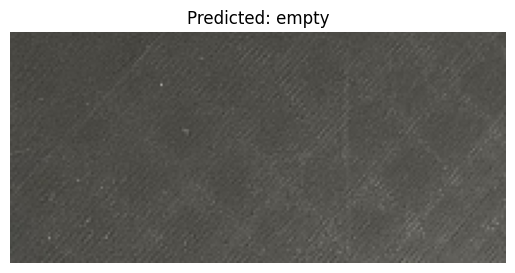

In [160]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img("/content/parkinglot-occupation/ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg"))
plt.title(f"Predicted: {class_names[predicted_class[0]]}")
plt.axis("off")
plt.show()


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

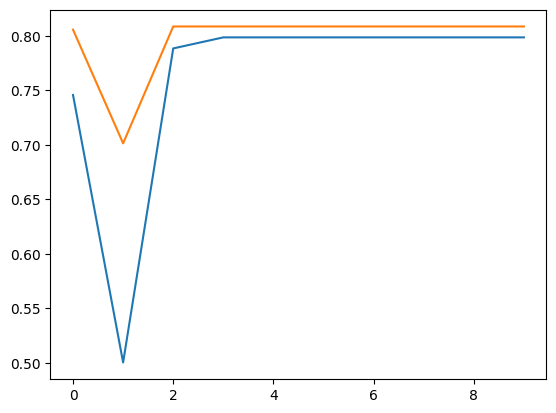

In [146]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

## Save the Model
Save the trained CNN model for submission.

In [143]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: